In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from helper_methods import *
import seaborn as sns
from custom_models.mlp import MLP
from custom_models.cnn import CNN
import torch.nn as nn
import torch.optim as optim


In [3]:
# set seaborn style
sns.set_theme(context='notebook', style='whitegrid', palette='bright', color_codes=True, rc=None)

In [4]:
(
    train_loader,
    train_loader_at_eval,
    test_loader,
    validation_loader,
    n_channels,
    n_classes,
    task,
    pil_dataset,
) = get_data_loaders()

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: C:\Users\josem\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\josem\.medmnist\dermamnist.npz


In [5]:
# first sample
sample = next(iter(train_loader))

print(f"Sample Shape: {sample[0].shape}")

# No of Neurons in Input Layer
# Output is flattened before feeding to MLP
input_size = n_channels * sample[0].shape[2] * sample[0].shape[3]

# No of Neurons in Hidden Layers
# hidden_sizes = [256, 128]

# No of Neurons in Output Layer
num_classes = n_classes

Sample Shape: torch.Size([128, 3, 28, 28])


In [22]:
N_LAYERS = 3
HIDDEN_LAYERS = ((input_size + num_classes) // 2,) * N_LAYERS

In [23]:
from pipeline import CustomModelPipeline

model = MLP(input_size=input_size, hidden_sizes=HIDDEN_LAYERS, num_classes=num_classes)

print(model)

pipeline = CustomModelPipeline(
    model=model,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(model.parameters(), lr=0.005),
    n_epochs=30,
    training_data=train_loader,
    validation_data=validation_loader,
    training_eval_data=train_loader_at_eval,
    test_data=test_loader,
)

pipeline.execute()


MLP(
  (layers): ModuleList(
    (0): Linear(in_features=2352, out_features=1179, bias=True)
    (1-2): 2 x Linear(in_features=1179, out_features=1179, bias=True)
    (3): Linear(in_features=1179, out_features=7, bias=True)
  )
  (activations): ModuleList(
    (0-2): 3 x ReLU()
  )
)
Epoch 0: training loss: 4.586065561121161
Epoch 1: training loss: 2.887704446099021
Epoch 2: training loss: 2.879347176985307
Epoch 3: training loss: 2.863246826692061
Epoch 4: training loss: 2.839117327603427
Epoch 5: training loss: 2.8374927217310124
Epoch 6: training loss: 2.8368665955283423
Epoch 7: training loss: 2.8668713482943446
Epoch 8: training loss: 2.851210711219094
Epoch 9: training loss: 2.8232337193055588
Epoch 10: training loss: 2.822972624952143
Epoch 11: training loss: 2.813133157383312
Epoch 12: training loss: 2.4246014508334075
Epoch 13: training loss: 2.2910057349638504
Epoch 14: training loss: 2.2846692193638196
Epoch 15: training loss: 2.2757606701417403
Epoch 16: training loss: 2.26

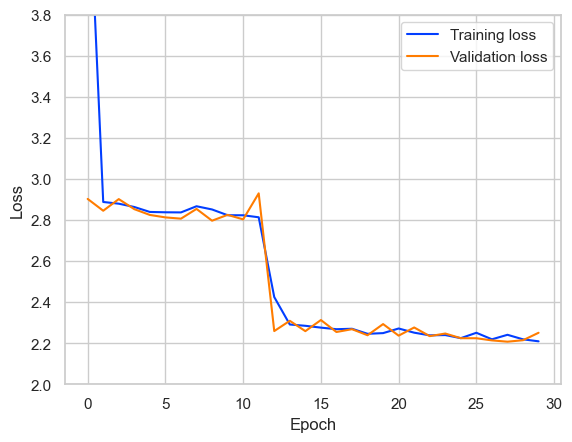

In [30]:
pipeline.plot_losses(y_lim=(2,3.8))

In [ ]:
from pipeline import CustomModelPipeline
cnn = CNN(input_channels=n_channels, num_classes=n_classes)

print(cnn)

pipeline_cnn = CustomModelPipeline(
    model=cnn,
    criterion=nn.CrossEntropyLoss(),
    optimizer=optim.Adam(cnn.parameters(), lr=0.001),
    n_epochs=30,
    training_data=train_loader,
    validation_data=validation_loader,
    training_eval_data=train_loader_at_eval,
    test_data=test_loader,
)

pipeline_cnn.execute()

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)


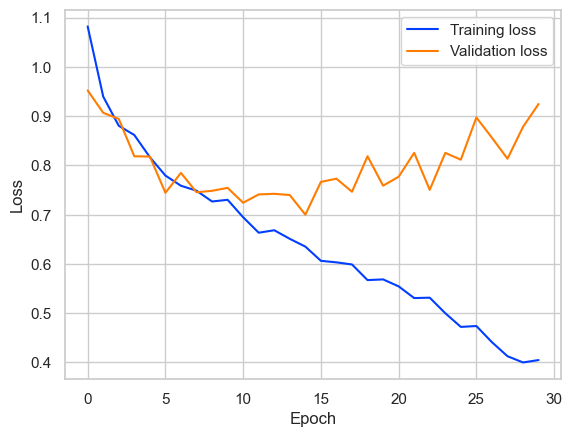

In [28]:
pipeline_cnn.plot_losses()